In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Siddharth\Downloads\archive\Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
X = df.copy()

In [5]:
X

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
#ATTRIBUTE 1/8

In [7]:
X['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [8]:
X['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
le = LabelEncoder()
X['area_type'] = le.fit_transform(X['area_type'])

In [10]:
X['area_type'].isna().sum()

0

In [11]:
#ATTRIBUTE 2/8

In [12]:
X = X.drop('availability' , axis = 'columns')

In [13]:
#ATTRIBUTE 3/8

In [14]:
X['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [15]:
X.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [16]:
locations = X.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [17]:
other_locations = locations[locations <= 10]
other_locations

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [18]:
X['location'] = X['location'].apply(lambda x : 'other' if x in other_locations else x)

In [19]:
X.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
other                        2900
Whitefield                    540
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                273
                             ... 
HAL 2nd Stage                  11
Nehru Nagar                    11
Kodigehalli                    11
2nd Phase Judicial Layout      11
Pattandur Agrahara             11
Name: location, Length: 242, dtype: int64

In [20]:
X['location'].isna().sum()

1

In [21]:
X  = X.dropna(subset = ['location'])

In [22]:
#ATTRIBUTE 4/8

In [23]:
X['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13319, dtype: object

In [24]:
def to_float(x):
    try :
        return (float(x.split()[0]))
    except:
        return None
        

In [25]:
X['size'] = X['size'].apply(lambda x : to_float(x))

In [26]:
X['size'].head()

0    2.0
1    4.0
2    3.0
3    3.0
4    2.0
Name: size, dtype: float64

In [27]:
X['size'].isna().sum()

16

In [28]:
X = X.dropna(subset = ['size'])

In [29]:
X.shape

(13303, 8)

In [30]:
#ATTRIBUTE 5/8

In [31]:
X['society']

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13303, dtype: object

In [32]:
X.groupby('society')['society'].agg('count').sort_values(ascending = False)

society
GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Eline P     1
Elley B     1
Elleyt      1
Elrisnt     1
NDncysi     1
Name: society, Length: 2676, dtype: int64

In [33]:
X['society'].isna().sum()

5499

In [34]:
X = X.drop('society',axis = 'columns')

In [35]:
#ATTRIBUTE 6/8

In [36]:
X['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13303, dtype: object

In [37]:
X['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def convert(x):
    try:
        return float(x)
    except:
        try:
            return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
        except:
            return None

In [39]:
X['total_sqft'] = X['total_sqft'].apply(lambda x:convert(x))

In [40]:
X['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [41]:
X['total_sqft'].isna().sum()
X.shape

(13303, 7)

In [42]:
X = X.dropna(subset = ['total_sqft'])

In [43]:
#ATTRIBUTE 7/8

In [44]:
X['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13257, dtype: float64

In [45]:
X['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [46]:
X.groupby('bath')['bath'].agg('count').sort_values(ascending = False)

bath
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
15.0       1
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [47]:
X.groupby('bath')['bath'].agg('count').sort_values(ascending = False)

bath
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
15.0       1
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [48]:
X['bath'] = X['bath'].apply(lambda x : None if x > 9 else x)

In [49]:
X['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13257, dtype: float64

In [50]:
X['bath'].isna().sum()

90

In [51]:
X = X.dropna(subset = ['bath'])

In [52]:
X.shape

(13167, 7)

In [53]:
# ATTRIBUTE 8/8

In [54]:
X['balcony'] = df['balcony'].copy()

In [55]:
X['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13167, dtype: float64

In [56]:
X['balcony'].isna().sum()

511

In [57]:
X['balcony'] = X['balcony'].fillna(0)

In [58]:
#ATTRIBUTE CHECKS COMPLETE

In [59]:
X.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [60]:
X

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,2,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,3,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,0,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,3,other,4.0,3600.0,5.0,0.0,400.00
13317,0,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,3,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [61]:
X['total_sqft'].sort_values(ascending = False)

1894     52272.0
5393     42000.0
5469     36000.0
674      35000.0
12987    30400.0
          ...   
1122        24.0
1020        15.0
349         11.0
4972         5.0
4086         1.0
Name: total_sqft, Length: 13167, dtype: float64

In [62]:
Y = X.copy()

In [63]:
Y

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,2,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,3,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,0,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,3,other,4.0,3600.0,5.0,0.0,400.00
13317,0,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,3,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [64]:
X = X[X['total_sqft']/X['size'] > 300]

In [65]:
X = X[X['total_sqft']/X['size'] < 1000]

In [66]:
X

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,2,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,3,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,3,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00
13315,0,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,3,other,4.0,3600.0,5.0,0.0,400.00
13317,0,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00


In [67]:
import matplotlib
from matplotlib import pyplot as plt
def plot_df(df , location):
    bhk2 = df[(df['location'] == location) & (df['size'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['size'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.xlabel("total_sqft");
    plt.ylabel("price");
    plt.scatter(bhk2['total_sqft'] , bhk2['price'] , color = 'blue' , marker = '.' , s = 50)
    plt.scatter(bhk3['total_sqft'] , bhk3['price'] , color = 'red' , marker = '+' , s = 50)
    plt.plot()
    
    
    

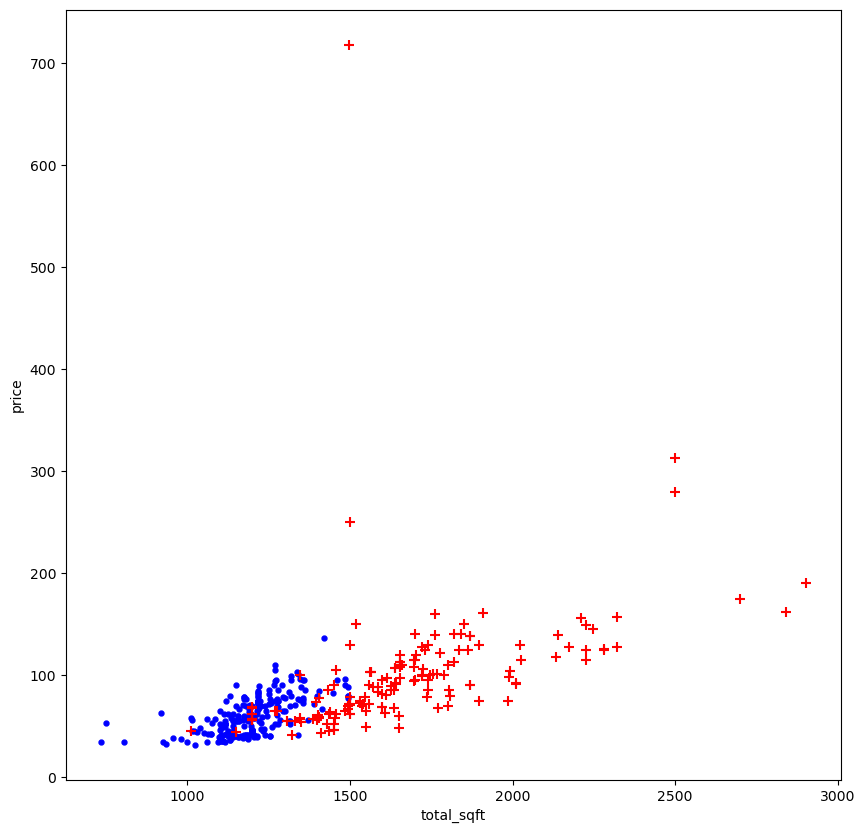

In [68]:
plot_df(X,"Whitefield")

In [69]:
X['price_per_sqft'] = X['total_sqft']/X['price']
X  

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,3,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,27.028411
1,2,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,21.666667
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,23.225806
3,3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,16.010526
4,3,Kothanur,2.0,1200.0,2.0,1.0,51.00,23.529412
...,...,...,...,...,...,...,...,...
13314,3,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00,15.312500
13315,0,Whitefield,5.0,3453.0,4.0,0.0,231.00,14.948052
13316,3,other,4.0,3600.0,5.0,0.0,400.00,9.000000
13317,0,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,19.016667


In [70]:
def rmv_pps_outliers(df_):
    df_out = pd.DataFrame()
    for key , subdf in df_.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        temp_df =  subdf[(subdf['price_per_sqft'] >= (m-sd)) & (subdf['price_per_sqft'] <= (m+sd))]
        df_out = pd.concat([df_out,  temp_df] , ignore_index = True)
    return df_out

In [71]:
X = rmv_pps_outliers(X)

In [72]:
dummies = pd.get_dummies(X['location'],dtype = int)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
X = pd.concat([X.drop(['location'] , axis = 'columns'), dummies.drop(['other'] , axis = 'columns')],axis = 'columns')

In [74]:
X

,area_type,size,total_sqft,bath,balcony,price,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,3.0,1250.0,2.0,3.0,44.00,28.409091,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3.0,1425.0,2.0,2.0,65.00,21.923077,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,947.0,2.0,2.0,43.00,22.023256,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1417.0,2.0,2.0,76.00,18.644737,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.0,1230.0,2.0,1.0,58.00,21.206897,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,3,2.0,1095.0,2.0,1.0,57.00,19.210526,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8245,0,2.0,1256.0,2.0,1.0,65.00,19.323077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,3,2.0,1353.0,2.0,2.0,110.00,12.300000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,3,3.0,1440.0,2.0,2.0,63.93,22.524636,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[]

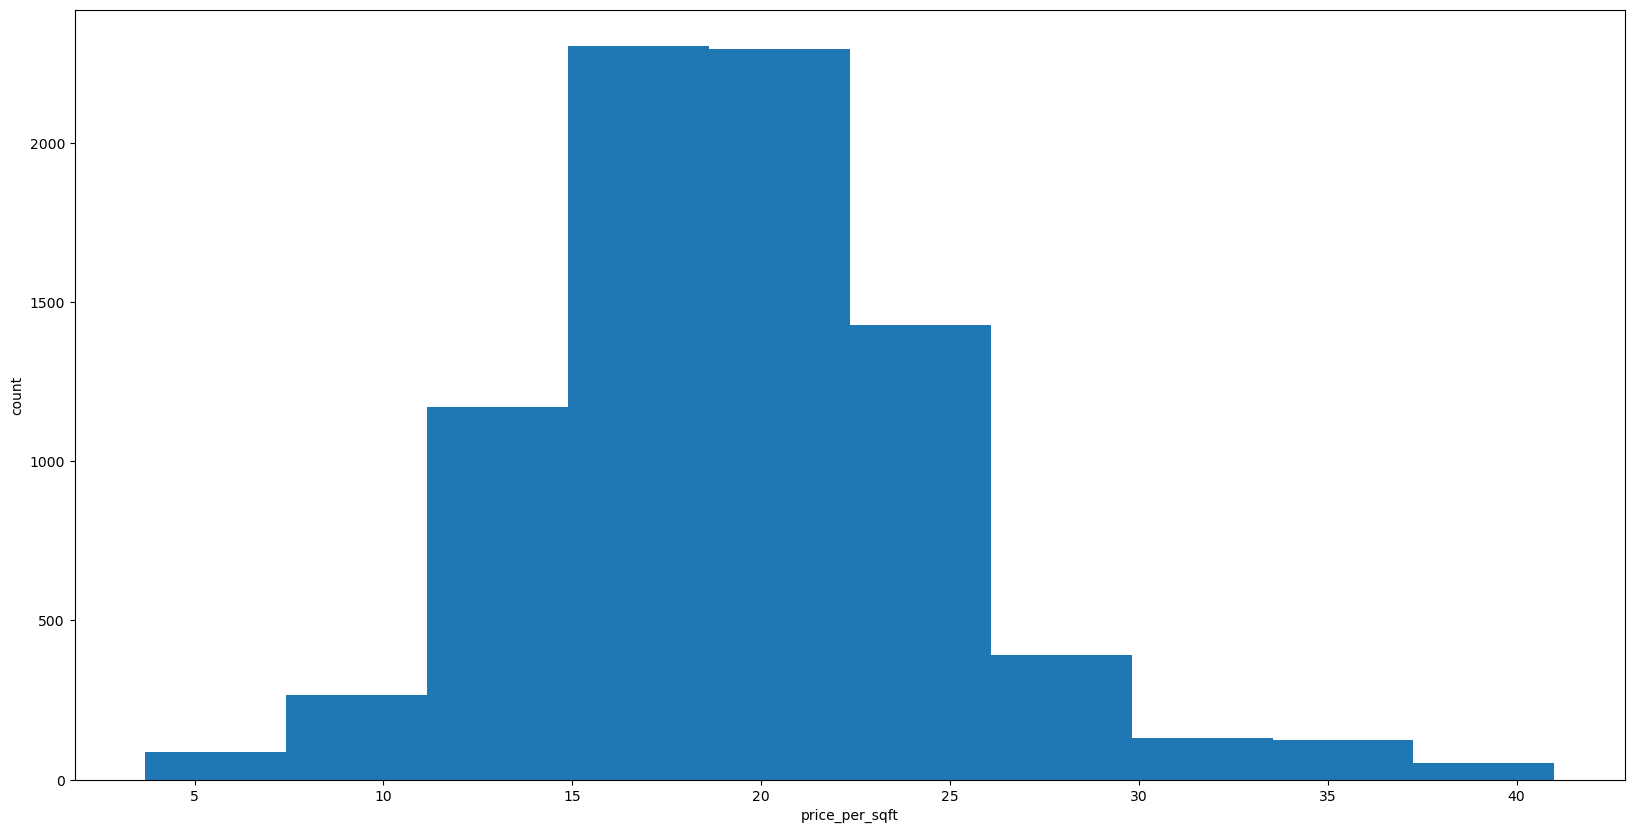

In [75]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(X['price_per_sqft'] , rwidth = 1)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.plot()

In [76]:
from sklearn.linear_model import LinearRegression as LnR
from sklearn.linear_model import Lasso as L1
from sklearn.linear_model import Ridge as L2
from sklearn.ensemble import RandomForestRegressor as RFR

In [77]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X.drop(['price'] , axis = 'columns') , X['price'])

In [78]:
from sklearn.model_selection import cross_val_score
scores = []
models = [LnR() , L1() , L2() , RFR()]
for model in models:
    score = cross_val_score(model , x_train , y_train ,cv = 5 , scoring = 'r2')
    scores.append(score)

In [79]:
for i in range(len(scores)):
    scores[i] = scores[i].mean()
scores

[-143718280418492.47,
 0.814381220799666,
 0.9143578123706675,
 0.9927029706029987]

In [80]:
model = models[scores.index(max(scores))]

In [81]:
model

RandomForestRegressor()

In [82]:
x_train[90:99]

,area_type,size,total_sqft,bath,balcony,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1624,3,3.0,1652.0,3.0,2.0,23.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6417,3,2.0,955.0,2.0,0.0,25.006546,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7731,0,3.0,1450.0,3.0,1.0,22.307692,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,3,3.0,1200.0,3.0,2.0,16.103060,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4514,3,4.0,2774.0,4.0,3.0,13.336538,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4985,3,4.0,2830.0,3.0,3.0,14.512821,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4777,3,2.0,1128.0,2.0,1.0,23.119492,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5787,2,3.0,1500.0,2.0,1.0,17.241379,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7098,3,2.0,925.0,2.0,3.0,22.023810,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
len(x_train.columns)

247

In [84]:
model.fit(x_train , y_train)

RandomForestRegressor()

In [85]:
model.score(x_test , y_test)

0.9946789750062035

In [86]:
def predict_price(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns)-1)
    
    # Set numerical values (assuming the correct column names)
    x[X.columns.get_loc('total_sqft')] = sqft
    x[X.columns.get_loc('bath')] = bath
    x[X.columns.get_loc('size')] = bhk

    # If location column exists in the data, set it to 1
    if location in X.columns:
        x[X.columns.get_loc(location)] = 1

    return model.predict([x])[0]


In [87]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Siddharth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


186.18

In [91]:
import pickle
with open('real_estate_prediction', 'wb') as f:
    pickle.dump(model , f)

In [93]:
import json
columns = { "data_columns" :[col.lower() for col in X.columns] }
with open ("cols_for_real_estate_banglore", 'w') as f:
    json.dump(columns,f)
    